In [1]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd

## Corrida 2

In [2]:
data1 = pd.read_csv('./2021.05.28-18.30.48.csv', delimiter='\t', parse_dates=['Time [s]'])

In [3]:
def has_keys(key_array, data):
    return sum([k in data.keys() for k in key_array]) == len(key_array)

gear_radii_def = np.array([0.0 ,10.0 ,18.0 , 28.5, 40.0, 50.0])

def compute_gear(data):
    if has_keys(['Vehicle Speed', 'Engine RPM'], data):
        data['Gear Radius'] = data['Vehicle Speed']/data['Engine RPM']/60e-5
        data['Gear'] = np.array([np.argmin(np.abs(gear_radii_def - g)) for g in data['Gear Radius'].rolling(5, center=True).median()])
        
def plot_variable(name, data, units='', label=''):
    f,ax = plot.subplots(figsize=(20,3))
    if type(name) == str:
        name = [name]
    for n in name:
        ax.plot(data['Time [s]'], data[n])
    ax.set_ylabel('{} [{}]'.format(name[0], units) if units else name[0])
    plot.show();
    
def plot_gear(data):
    compute_gear(data)

    f,ax = plot.subplots(figsize=(20,3))
    ax.plot(data['Time [s]'], np.array([gear_radii_def[g] for g in data['Gear']]), alpha=1, c='k')
    ax.plot(data['Time [s]'], data['Gear Radius'], lw=2, alpha=0.7)
    for i in gear_radii_def[1:]:
        ax.axhline(i, ls='dashed', c='k', alpha=0.2)
    ax.set_ylabel("Gear effective radius (cm)");
    

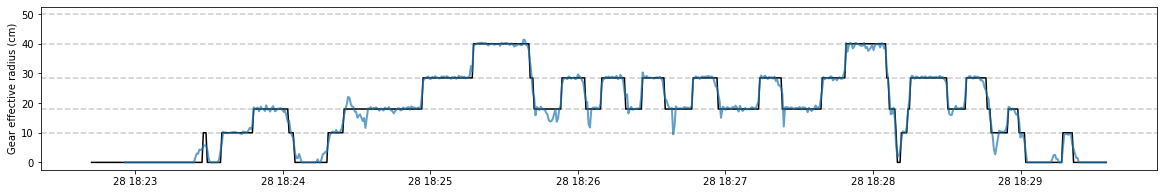

In [4]:
plot_gear(data1)

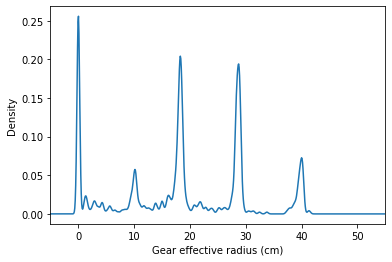

In [5]:
data1['Gear Radius'].plot.kde(0.02)
plot.xlabel('Gear effective radius (cm)');
plot.xlim(-5,55);

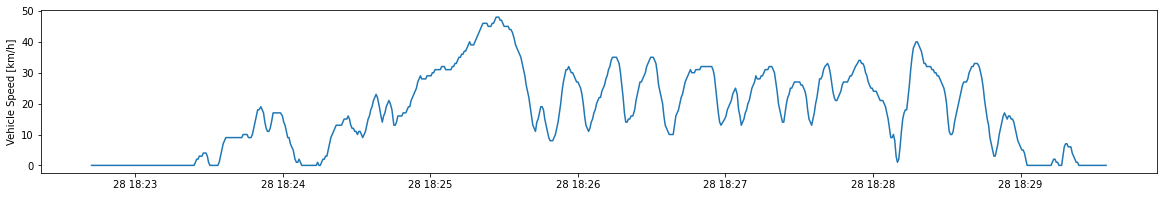

In [6]:
plot_variable('Vehicle Speed', data1, units='km/h')

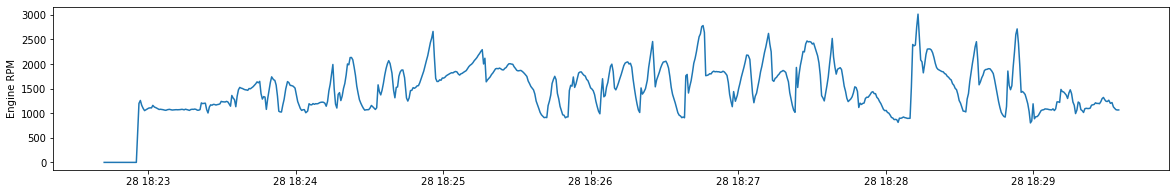

In [7]:
plot_variable('Engine RPM', data1)

## Corrida 1

In [8]:
data2 = pd.read_csv('./2021.05.28-17.39.13.csv', delimiter='\t', parse_dates=['Time [s]'])

In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Time [s]                                        252 non-null    datetime64[ns]
 1   Calculated Load Value                           252 non-null    float64       
 2   Coolant Temperature                             252 non-null    float64       
 3   Short term secondary oxygen sensor trim bank 1  252 non-null    float64       
 4   Long term secondary oxygen sensor trim bank 1   252 non-null    float64       
 5   Intake Manifold Pressure                        252 non-null    float64       
 6   Engine RPM                                      252 non-null    float64       
 7   Vehicle Speed                                   252 non-null    float64       
 8   Timing Advance (Cyl. #1)                        25

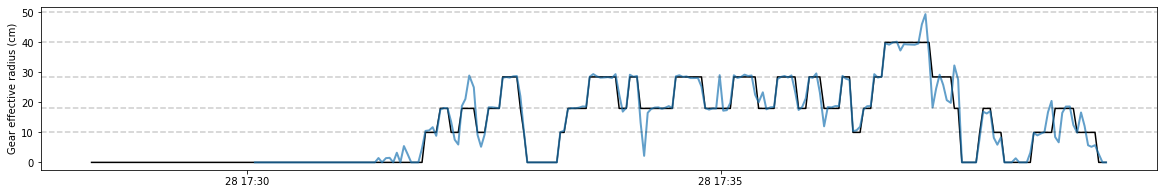

In [10]:
plot_gear(data2)

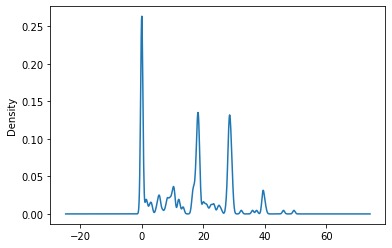

In [11]:
data2['Gear Radius'].plot.kde(0.03);

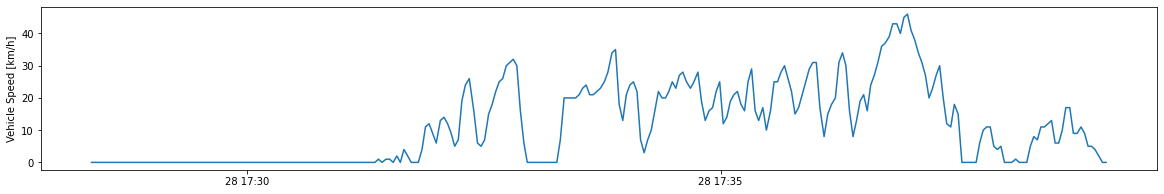

In [12]:
plot_variable('Vehicle Speed', data2, units='km/h')

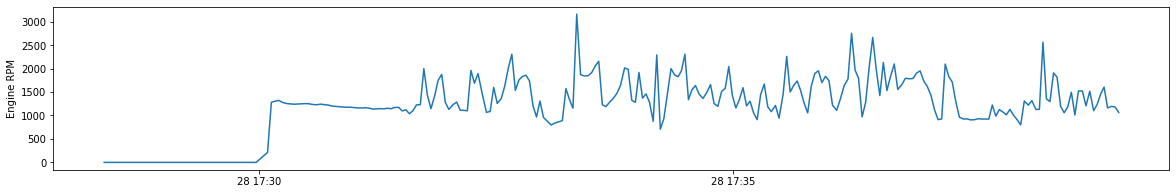

In [13]:
plot_variable('Engine RPM', data2)

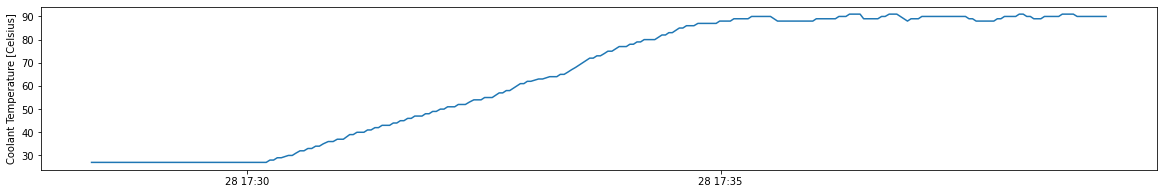

In [14]:
plot_variable('Coolant Temperature', data2, units='Celsius')

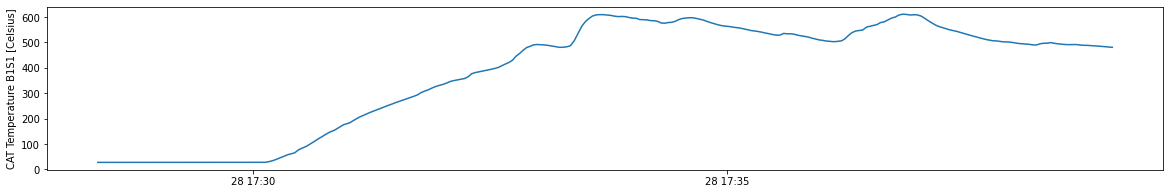

In [15]:
plot_variable('CAT Temperature B1S1', data2, units='Celsius')

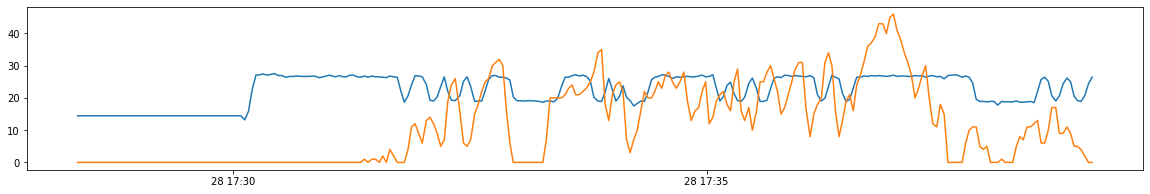

In [16]:
f,ax = plot.subplots(figsize=(20,3))
ax.plot(data2['Time [s]'], data2['ECU voltage']*5-45)
ax.plot(data2['Time [s]'], data2['Vehicle Speed']);

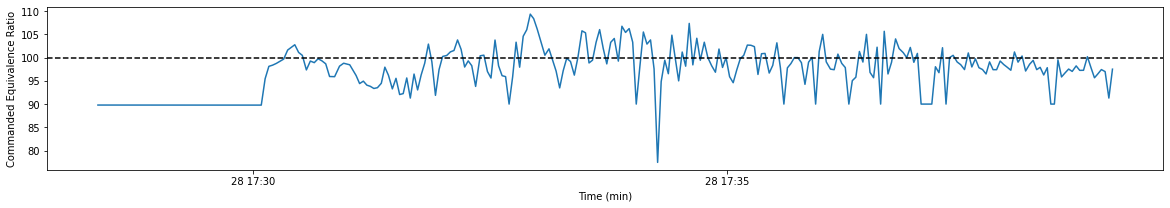

In [17]:
f,ax = plot.subplots(figsize=(20,3))
ax.plot(data2['Time [s]'], data2['Commanded Equivalence Ratio'])
ax.axhline(100, ls='dashed', c='k')
ax.set_xlabel("Time (min)")
ax.set_ylabel("Commanded Equivalence Ratio");

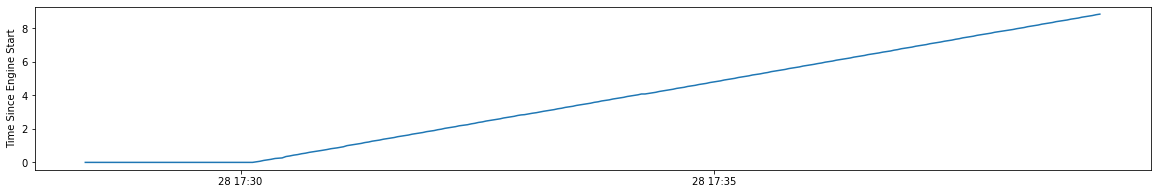

In [18]:
f,ax = plot.subplots(figsize=(20,3))
ax.plot(data2['Time [s]'], data2['Time Since Engine Start']*60)
ax.set_ylabel("Time Since Engine Start");

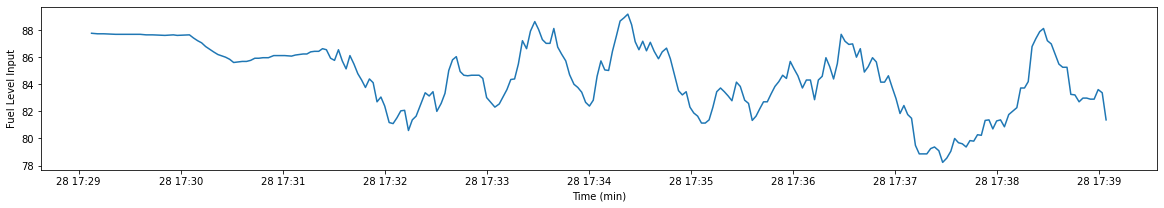

In [19]:
f,ax = plot.subplots(figsize=(20,3))
ax.plot(data2['Time [s]'], data2['Fuel Level Input'].rolling(10).mean())
ax.set_xlabel("Time (min)")
ax.set_ylabel("Fuel Level Input");

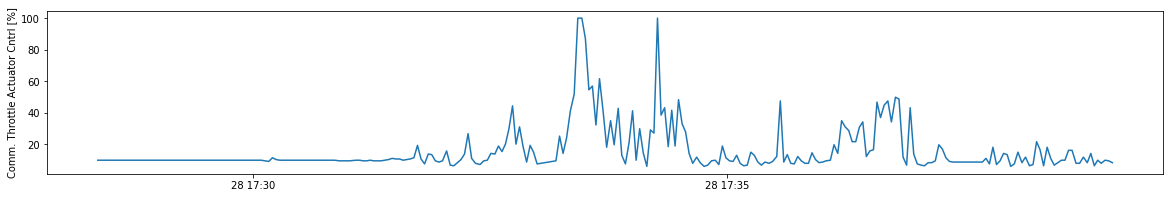

In [20]:
plot_variable('Comm. Throttle Actuator Cntrl', data2, units='%')

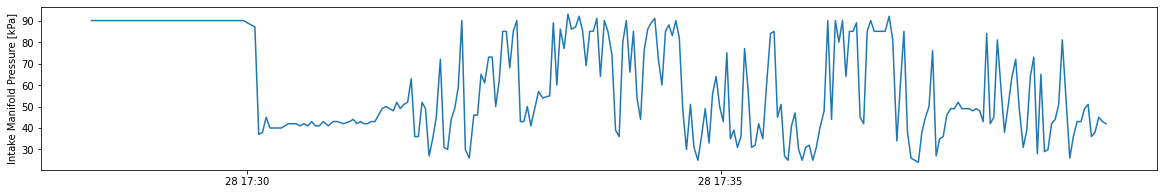

In [21]:
plot_variable('Intake Manifold Pressure', data2, units='kPa')

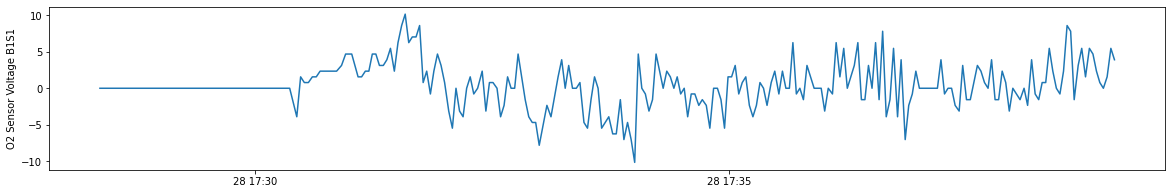

In [22]:
plot_variable('O2 Sensor Voltage B1S1', data2)

In [23]:
data2.corr()

,Calculated Load Value,Coolant Temperature,Short term secondary oxygen sensor trim bank 1,Long term secondary oxygen sensor trim bank 1,Intake Manifold Pressure,Engine RPM,Vehicle Speed,Timing Advance (Cyl. #1),Intake Air Temperature,Absolute Throttle Position,...,CAT Temperature B1S1,ECU voltage,Absolute Engine Load,Commanded Equivalence Ratio,Ambient Air Temperature,Comm. Throttle Actuator Cntrl,Ethanol fuel %,Unnamed: 28,Gear Radius,Gear
Calculated Load Value,1.000000,0.378494,-0.084241,0.404687,0.404138,0.576920,0.364661,0.285087,-0.349060,0.566105,...,0.545553,0.324707,0.870099,0.389852,0.040410,0.703949,NaN,NaN,0.171991,0.350033
Coolant Temperature,0.378494,1.000000,-0.078935,0.110313,-0.163161,0.494408,0.573887,0.173575,0.055628,0.094940,...,0.924973,0.270356,0.383597,0.319833,-0.509371,0.151669,NaN,NaN,0.544308,0.645083
Short term secondary oxygen sensor trim bank 1,-0.084241,-0.078935,1.000000,-0.133384,-0.104522,0.058235,-0.223727,0.009825,0.209548,-0.173283,...,-0.159342,0.087182,-0.106500,-0.422264,-0.091329,-0.139773,NaN,NaN,-0.314326,-0.265038
Long term secondary oxygen sensor trim bank 1,0.404687,0.110313,-0.133384,1.000000,0.366194,0.194348,0.260731,0.206657,-0.172367,0.241003,...,0.188290,0.089529,0.234507,0.077146,0.106017,0.181882,NaN,NaN,0.225257,0.249925
Intake Manifold Pressure,0.404138,-0.163161,-0.104522,0.366194,1.000000,-0.171355,0.034448,0.069623,-0.143512,0.636059,...,-0.097066,-0.327609,0.317857,-0.180449,0.238173,0.556754,NaN,NaN,0.166820,0.001575
Engine RPM,0.576920,0.494408,0.058235,0.194348,-0.171355,1.000000,0.605687,0.416289,-0.384516,0.215174,...,0.607285,0.424455,0.619090,0.431973,-0.014671,0.389439,NaN,NaN,0.303656,0.469459
Vehicle Speed,0.364661,0.573887,-0.223727,0.260731,0.034448,0.605687,1.000000,0.317581,-0.466682,0.269619,...,0.673254,0.303519,0.404967,0.268043,-0.039995,0.362276,NaN,NaN,0.934016,0.923479
Timing Advance (Cyl. #1),0.285087,0.173575,0.009825,0.206657,0.069623,0.416289,0.317581,1.000000,-0.185717,0.253754,...,0.247593,0.168764,0.295383,0.133623,0.163919,0.232312,NaN,NaN,0.160114,0.270489
Intake Air Temperature,-0.349060,0.055628,0.209548,-0.172367,-0.143512,-0.384516,-0.466682,-0.185717,1.000000,-0.313113,...,-0.243030,-0.149687,-0.433282,-0.290276,-0.606636,-0.423424,NaN,NaN,-0.358197,-0.384860
Absolute Throttle Position,0.566105,0.094940,-0.173283,0.241003,0.636059,0.215174,0.269619,0.253754,-0.313113,1.000000,...,0.216798,-0.028320,0.546850,0.044587,0.184126,0.816361,NaN,NaN,0.219432,0.233981


### Computing derived quantities

Reference: [DashCommand CALC PID](https://www.palmerperformance.com/download/CALC_PID_Reference.pdf)

In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 31 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Time [s]                                        252 non-null    datetime64[ns]
 1   Calculated Load Value                           252 non-null    float64       
 2   Coolant Temperature                             252 non-null    float64       
 3   Short term secondary oxygen sensor trim bank 1  252 non-null    float64       
 4   Long term secondary oxygen sensor trim bank 1   252 non-null    float64       
 5   Intake Manifold Pressure                        252 non-null    float64       
 6   Engine RPM                                      252 non-null    float64       
 7   Vehicle Speed                                   252 non-null    float64       
 8   Timing Advance (Cyl. #1)                        25

#### Mass Air Flow (g/s)
__Method A__

MAF [g/s] = 1.184 [g/l] * displacement [l/intake stroke] * load_abs / 100 * engine_speed [r/min] / 2 [r/intake stroke] / 60 [sec/min]

__Method B__

MAF [g/s] = (MAP/IAT) * (M/R) * (RPM/60) * (ED/2) * VE, where

* MAP [kPa] is the manifold absolute pressure
* IAT [K] is the intake air temperature
* M [g/mol] is the molecular mass of air R [J/(K*mol)] is gas constant for air RPM [r/min] is the engine speed
* ED [l] is the engine displacement
* VE is the volumetric efficiency

In [25]:
def compute_maf(data):
    if has_keys(['Absolute Engine Load', 'Engine RPM'], data):
        # (1.184 g/l) * 1 l * (1/60) Hz / 2 = 0.00986666667 g/s
        data['MAF_A'] = 0.0098666666 * data['Absolute Engine Load']/100 * data['Engine RPM']
        
    if has_keys(['Intake Manifold Pressure', 'Intake Air Temperature', 'Engine RPM'], data):
        # (1 kPa / 1K) * ((28.97 g/mol)/(8.3144598 joules/K/mol)) * ((1/60) Hz) * (1 l /2) = 0.0290357609 g/s
        data['MAF_B'] = 0.0290357609 * data['Intake Manifold Pressure'] / (data['Intake Air Temperature'] + 273) * data['Engine RPM'] * 0.75
    
    if has_keys(['MAF_A'], data):
        data['MAF'] = data['MAF_A']
        
    elif has_keys(['MAF_B'], data):
        data['MAF'] = data['MAF_B']

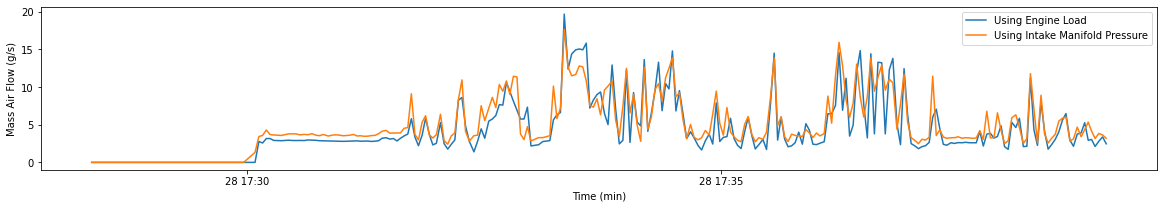

In [26]:
compute_maf(data2)

f,ax = plot.subplots(figsize=(20,3))
ax.plot(data2['Time [s]'], data2['MAF_A'], label="Using Engine Load")
ax.plot(data2['Time [s]'], data2['MAF_B'], label="Using Intake Manifold Pressure")
ax.legend()
ax.set_xlabel("Time (min)")
ax.set_ylabel("Mass Air Flow (g/s)");

#### Fuel Consumption

fuel_flow = mass_air_flow / (AFRactual * fuel_density) where AFRactual = lambda * AFRstoich

In [27]:
def compute_fuel_consumption(data):
    compute_maf(data)
    if has_keys(['Commanded Equivalence Ratio'], data):
        ETHANOL_PERCENT = data['Ethanol fuel %'] if has_keys(['Ethanol fuel %'], data) else 52
        data['AFR'] = (14.7 + (9.0 - 14.7)*ETHANOL_PERCENT/100) * data['Commanded Equivalence Ratio']/100 # for now, assuming commanded EQ = actual
                
    if has_keys(['MAF', 'AFR'], data):
        # 1 g/s / 1 g/ml = 1e-3 l/s
        data['Fuel Flow'] = 1e-3*data['MAF'] / data['AFR'] / 0.800
    
    if has_keys(['Vehicle Speed', 'Fuel Flow'], data):
        data['Fuel Consumption'] = data['Vehicle Speed']/3600 /data['Fuel Flow']

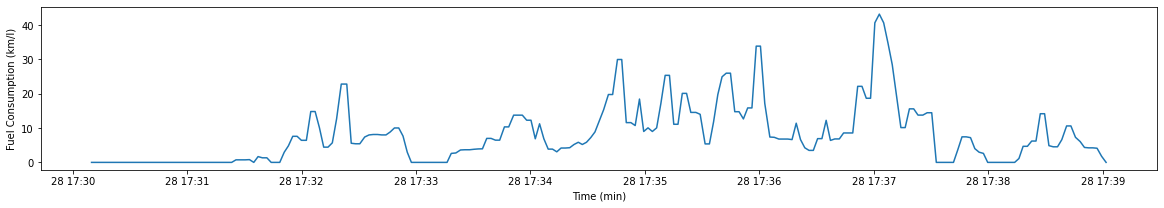

In [28]:
compute_fuel_consumption(data2)

f,ax = plot.subplots(figsize=(20,3))
ax.plot(data2['Time [s]'], data2['Fuel Consumption'].rolling(3, center=True).median())
ax.set_xlabel("Time (min)")
ax.set_ylabel("Fuel Consumption (km/l)");

### Variables interesting to measure (0.1 sec per variable)

* Coolant Temperature
* Intake Manifold Pressure
* Engine RPM
* Vehicle Speed
* Intake Air Temperature
* Fuel Level Input
* Distance since ECU reset
* CAT Temperature B1S1
* Absolute Engine Load
* Commanded Equivalence Ratio
* Comm. Throttle Actuator Cntrl
* Ethanol fuel %

or:

* Engine RPM
* Vehicle Speed
* Fuel Level Input
* Distance since ECU reset
* Absolute Engine Load
* Commanded Equivalence Ratio
* Comm. Throttle Actuator Cntrl

### Corrida 3

In [29]:
data3 = pd.read_csv('./2021.05.29-15.32.56.csv', delimiter='\t', parse_dates=['Time [s]'])
data4 = pd.read_csv('./2021.05.29-15.56.14.csv', delimiter='\t', parse_dates=['Time [s]'])

In [30]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Time [s]                       1207 non-null   datetime64[ns]
 1   Coolant Temperature            1207 non-null   float64       
 2   Intake Manifold Pressure       1207 non-null   float64       
 3   Engine RPM                     1207 non-null   float64       
 4   Vehicle Speed                  1207 non-null   float64       
 5   Intake Air Temperature         1207 non-null   float64       
 6   Fuel Level Input               1207 non-null   float64       
 7   Distance since ECU reset       1207 non-null   float64       
 8   CAT Temperature B1S1           1207 non-null   float64       
 9   Absolute Engine Load           1207 non-null   float64       
 10  Commanded Equivalence Ratio    1207 non-null   float64       
 11  Comm. Throttle Ac

In [31]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Time [s]                       1952 non-null   datetime64[ns]
 1   Engine RPM                     1952 non-null   float64       
 2   Vehicle Speed                  1952 non-null   float64       
 3   Fuel Level Input               1952 non-null   float64       
 4   Distance since ECU reset       1952 non-null   float64       
 5   Absolute Engine Load           1952 non-null   float64       
 6   Commanded Equivalence Ratio    1952 non-null   float64       
 7   Comm. Throttle Actuator Cntrl  1952 non-null   float64       
 8   Unnamed: 8                     0 non-null      float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 137.4 KB


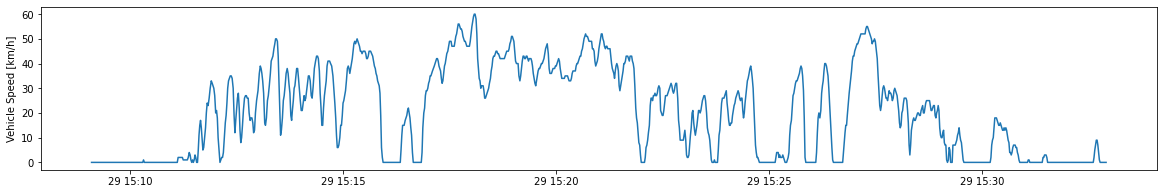

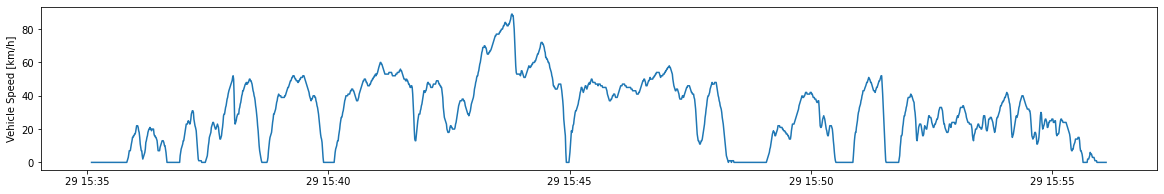

In [32]:
plot_variable('Vehicle Speed', data3, units='km/h')
plot_variable('Vehicle Speed', data4, units='km/h')

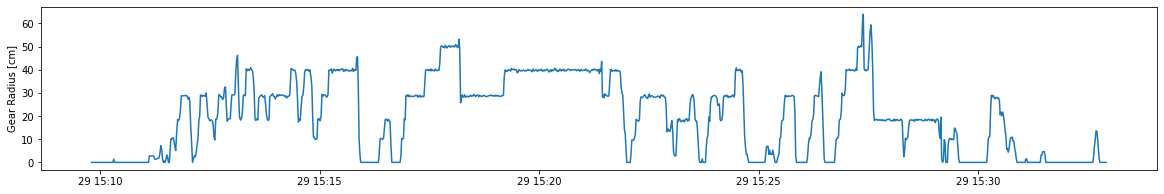

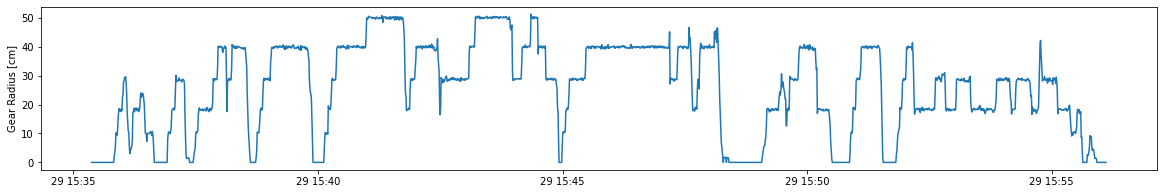

In [33]:
compute_gear(data3)
compute_gear(data4)
plot_variable('Gear Radius', data3, units='cm')
plot_variable('Gear Radius', data4, units='cm')

In [34]:
compute_fuel_consumption(data3)
compute_fuel_consumption(data4)

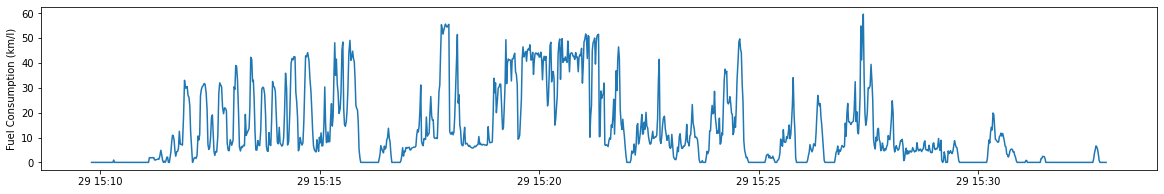

In [35]:
f,ax = plot.subplots(figsize=(20,3))
ax.plot(data3['Time [s]'], data3['Fuel Consumption'])
ax.set_ylabel("Fuel Consumption (km/l)");

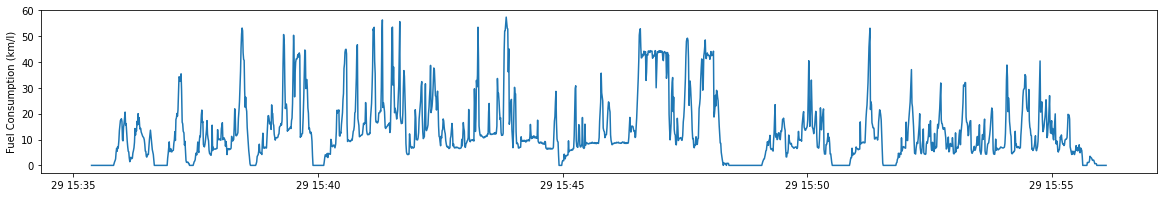

In [36]:
f,ax = plot.subplots(figsize=(20,3))
ax.plot(data4['Time [s]'], data4['Fuel Consumption'])
ax.set_ylabel("Fuel Consumption (km/l)");

In [37]:
((data3['Time [s]'][len(data3)-1] - data3['Time [s]'][0])/len(data3))

Timedelta('0 days 00:00:01.184874067')

In [38]:
((data4['Time [s]'][len(data4)-1] - data4['Time [s]'][0])/len(data4))

Timedelta('0 days 00:00:00.646208504')

In [39]:
data3.corr()['Fuel Consumption']

Coolant Temperature              0.226341
Intake Manifold Pressure        -0.528406
Engine RPM                       0.314950
Vehicle Speed                    0.749719
Intake Air Temperature          -0.237442
Fuel Level Input                -0.034712
Distance since ECU reset        -0.141225
CAT Temperature B1S1            -0.069655
Absolute Engine Load            -0.495233
Commanded Equivalence Ratio     -0.231049
Comm. Throttle Actuator Cntrl   -0.228172
Ethanol fuel %                        NaN
Unnamed: 13                           NaN
Gear Radius                      0.810568
Gear                             0.797577
MAF_A                           -0.264314
MAF_B                           -0.229929
MAF                             -0.264314
AFR                             -0.231049
Fuel Flow                       -0.259482
Fuel Consumption                 1.000000
Name: Fuel Consumption, dtype: float64

In [40]:
data3.corr()['MAF_B']

Coolant Temperature              0.288821
Intake Manifold Pressure         0.800169
Engine RPM                       0.635777
Vehicle Speed                    0.328803
Intake Air Temperature          -0.110303
Fuel Level Input                 0.054690
Distance since ECU reset        -0.006001
CAT Temperature B1S1             0.433531
Absolute Engine Load             0.773045
Commanded Equivalence Ratio      0.217431
Comm. Throttle Actuator Cntrl    0.813876
Ethanol fuel %                        NaN
Unnamed: 13                           NaN
Gear Radius                      0.187540
Gear                             0.213208
MAF_A                            0.913071
MAF_B                            1.000000
MAF                              0.913071
AFR                              0.217431
Fuel Flow                        0.914114
Fuel Consumption                -0.229929
Name: MAF_B, dtype: float64

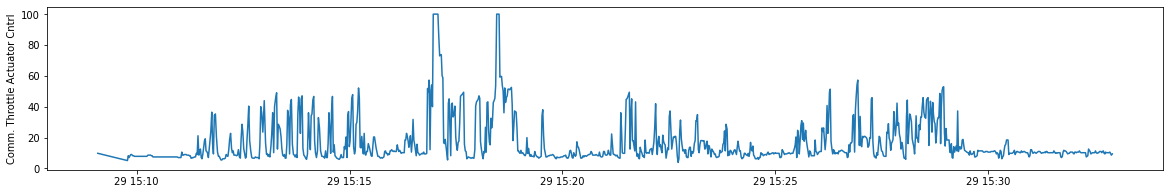

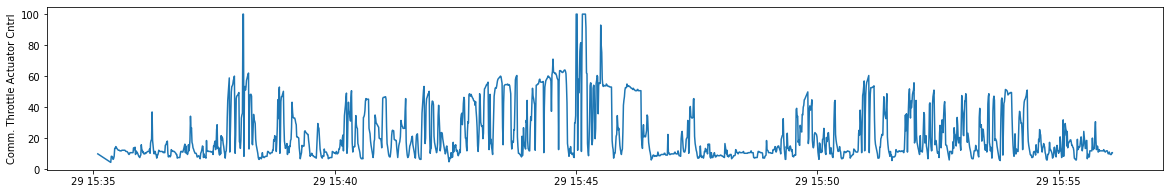

In [41]:
plot_variable('Comm. Throttle Actuator Cntrl', data3)
plot_variable('Comm. Throttle Actuator Cntrl', data4)

## Viagem para São Paulo 1

In [155]:
data = pd.read_csv('./2021.05.30-13.32.49.csv', delimiter='\t', parse_dates=['Time [s]'], index_col='Time [s]')

KeyError: 'Time [s]'

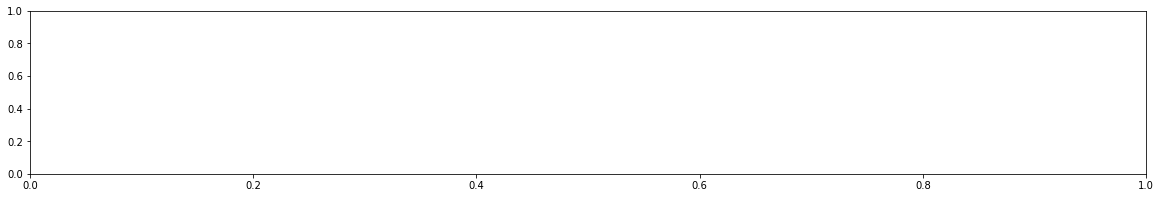

In [156]:
plot_gear(data)
plot.ylim(0,60);

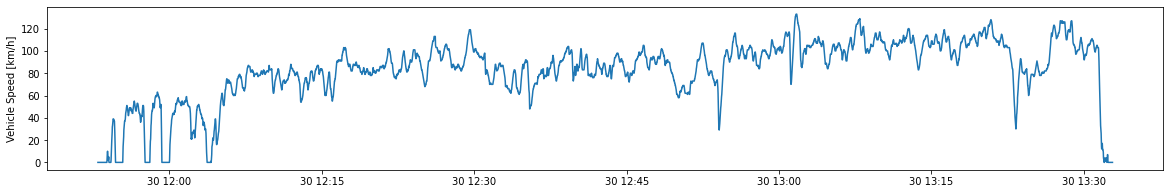

In [93]:
plot_variable('Vehicle Speed', data, units='km/h')

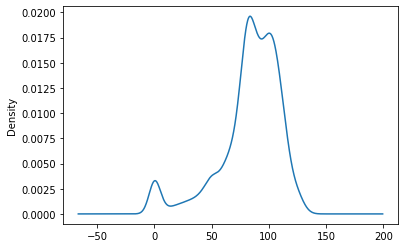

In [94]:
data['Vehicle Speed'].plot.kde();

In [95]:
len(data)

5283

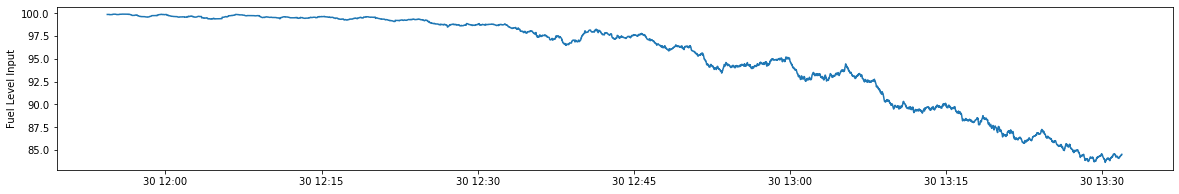

In [96]:
f,ax = plot.subplots(figsize=(20,3))
ax.plot(data['Time [s]'], data['Fuel Level Input'].rolling(100,center=True).mean())
ax.set_ylabel("Fuel Level Input");

In [124]:
compute_fuel_consumption(data)

In [109]:
import scipy.integrate as integrate

In [150]:
df = data.set_index('Time [s]')

integrate.trapz(df['Fuel Consumption'], df.index.astype(np.int64) / 10**9)

# f,ax = plot.subplots(figsize=(20,3))
# ax.plot(data['Time [s]'], df.rolling(100).apply(integrate.trapz))
# ax.set_ylabel("Fuel Consumption");

125506.58557927773

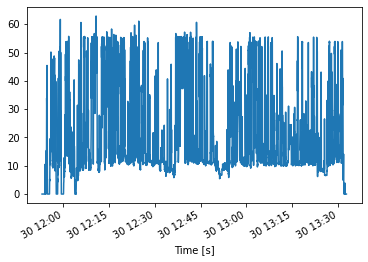

In [152]:
df['Fuel Consumption'].plot();

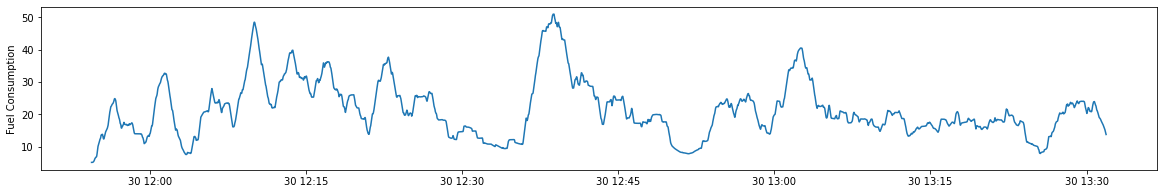

In [154]:
f,ax = plot.subplots(figsize=(20,3))
ax.plot(df['Fuel Consumption'].rolling(100,center=True).mean())
ax.set_ylabel("Fuel Consumption");